In [1]:
#pip install pandas_profiling
#!pip install Janitor

# Data Description:
The file Bank.xls contains data on 5000 customers. The data include customer
demographic information (age, income, etc.), the customer's relationship with
the bank (mortgage, securities account, etc.), and the customer response to the
last personal loan campaign (Personal Loan). Among these 5000 customers,
only 480 (= 9.6%) accepted the personal loan that was offered to them in the
earlier campaign.
# Domain:
Banking

# Context:
This case is about a bank (Thera Bank) whose management wants to explore
ways of converting its liability customers to personal loan customers (while
retaining them as depositors). A campaign that the bank ran last year for liability
customers showed a healthy conversion rate of over 9% success. This has
encouraged the retail marketing department to devise campaigns with better
target marketing to increase the success ratio with minimal budget.
Attribute Information:
1. ID : Customer ID
2. Age : Customer's age in completed years
3. Experience : #years of professional experience
4. Income : Annual income of the customer 
5. ZIP Code : Home Address ZIP code.
6. Family : Family size of the customer
7. CCAvg : Avg. spending on credit cards per month 
8. Education : Education Level.
1. Undergrad
2. Graduate
3. Advanced/Professional
9. Mortgage : Value of house mortgage if any. 
10. Personal Loan : Did this customer accept the personal loan offered in the last campaign?
11. Securities Account : Does the customer have a securities account with the bank?
12. CD Account : Does the customer have a certificate of deposit (CD) account with the bank?
13. Online : Does the customer use internet banking facilities?
14. Credit card : Does the customer use a credit card issued by Thera Bank?

In [2]:
#import require models
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("husl", 8) 
import dexplot as dex
import pandas_profiling
import warnings
from sklearn import preprocessing
from sklearn.metrics import roc_curve, auc

warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
#check data
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.shape

(5000, 14)

### Step-1 : Understand data

In [4]:
data.sample(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4951,4952,53,27,65,92124,1,2.20,3,0,0,0,0,1,1
3264,3265,67,41,114,95616,4,2.40,3,0,0,0,0,1,0
1057,1058,30,0,63,95503,2,1.75,3,0,0,0,0,1,0
1488,1489,38,12,39,95825,2,0.30,1,174,0,0,0,1,0
2673,2674,54,30,88,92647,4,1.00,2,122,0,0,0,1,0


In [5]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [6]:
data.info()
#data has no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Summary : 
1. Bank data has information on 5000 customers.
2. There are total 14 columns, with data type as integer and float. Even categorical data has data type int.
3. Data has no missing data

### Step - 2 EDA

In [7]:
#converting categorical variables to object for EDA
data_1=data.copy()
data_1['Family']=data_1['Family'].astype('object')
data_1['Education']=data_1['Education'].astype('object')
data_1['Personal Loan']=data_1['Personal Loan'].astype('object')
data_1['Securities Account']=data_1['Securities Account'].astype('object')
data_1['CD Account']=data_1['CD Account'].astype('object')
data_1['Online']=data_1['Online'].astype('object')
data_1['CreditCard']=data_1['CreditCard'].astype('object')

In [8]:
data_1.describe(include='all')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.0,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.0
unique,NaN,NaN,NaN,NaN,NaN,4.0,NaN,3.0,NaN,2.0,2.0,2.0,2.0,2.0
top,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,0.0,0.0,0.0,1.0,0.0
freq,NaN,NaN,NaN,NaN,NaN,1472.0,NaN,2096.0,NaN,4520.0,4478.0,4698.0,2984.0,3530.0
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,NaN,1.937938,NaN,56.498800,NaN,NaN,NaN,NaN,NaN
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,NaN,1.747659,NaN,101.713802,NaN,NaN,NaN,NaN,NaN
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,NaN,0.700000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,NaN,1.500000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,NaN,2.500000,NaN,101.000000,NaN,NaN,NaN,NaN,NaN


Summary
1. ID: Customer ID, is unique for all customers and can be droped from analysis
2. Age: Age of the customer. Its avaiable for all the customers. Bank has the customer base from age 23 to 65, with average age 45
3. Experience : customer's years of experience. is from -3 to 43. -3 years of experience looks like data issue, with average experience being 20 years
4. Zipcode: home address zipcode
5. Family: size of customer's family, ranges from 1-4. 1 being most frequent.
6. CCavg: average spend on credit card ranges from 0-10K. Usage of 75percent of customers if 2.5K monthly. Since maximum, is10k. There might be some outlliers, showing spend behaviour of 25 percent customers is different than others.
7. Education: there are 3 levels of education, 1-'Undergrad' is more frequent
8. Mortgage-Mortgage if any. 50 percent customer do not have mortgage with bank. Average Mortgage is 56K with 25% data has higher amount of mortgage. Or there can be presence of outliers.
9. Personal Loan : there are two categories, 0 and 1. 0 being most prevalent. Who has not accepted personal loan offer.
10. Securities accounts: has 2 categories, 0 and 1. 0 being most frequent, implies, most of the customer from given customer database do not have security account
11. CD account: has 2 catgories, 0 being most frequent, shows customers do not have CD account with bank
12. Online : has 2 categories, 1 being frequent. shows customers uses online banking
13. Creditcard:has 2 categories, 0 being most freqent, shows most of the customers do not have credit card. shows expansion opportunity for bank

### Step- 2.1 Univariate analysis

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


Distribution of Personal Loan
0    0.904
1    0.096
Name: Personal Loan, dtype: float64


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


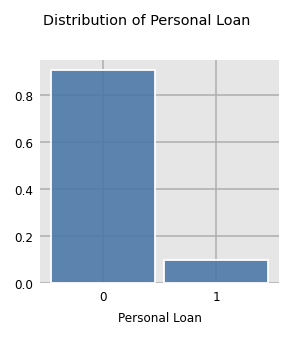

In [9]:
print("Distribution of Personal Loan")
print(data_1['Personal Loan'].value_counts(normalize=True))
dex.count('Personal Loan',data=data_1,title='Distribution of Personal Loan', normalize=True )

Distribution of Customer's Family
1    0.2944
2    0.2592
4    0.2444
3    0.2020
Name: Family, dtype: float64


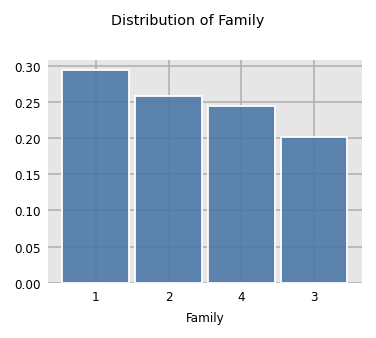

In [10]:
print("Distribution of Customer's Family")
print(data_1['Family'].value_counts(normalize=True))
dex.count('Family',data=data_1,title='Distribution of Family' , normalize=True)

Distribution of Customer's Education
1    0.4192
3    0.3002
2    0.2806
Name: Education, dtype: float64


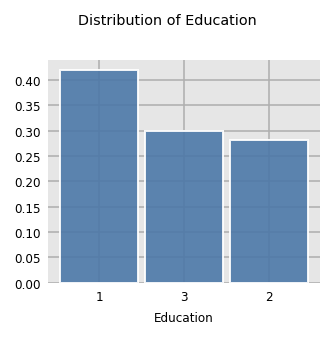

In [11]:
print("Distribution of Customer's Education")
print(data_1['Education'].value_counts(normalize=True))
dex.count('Education',data=data_1,title='Distribution of Education' , normalize=True)

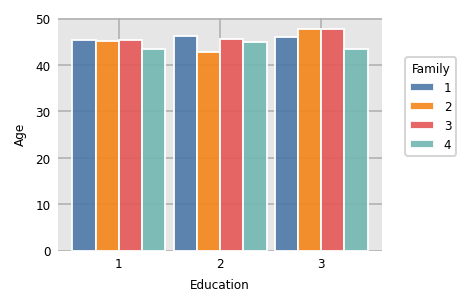

In [12]:
dex.bar(x='Education', y='Age',split='Family' ,aggfunc='mean',data=data_1 )

Distribution of Customer's Securities Account
0    0.8956
1    0.1044
Name: Securities Account, dtype: float64


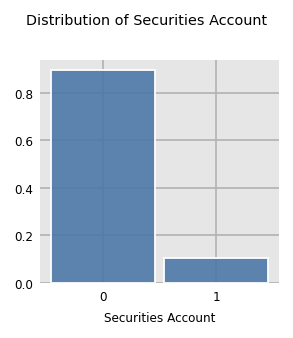

In [13]:
print("Distribution of Customer's Securities Account")
print(data_1['Securities Account'].value_counts(normalize=True))
dex.count('Securities Account',data=data_1,title='Distribution of Securities Account' , normalize=True)

Distribution of Customer's CD Account
0    0.9396
1    0.0604
Name: CD Account, dtype: float64


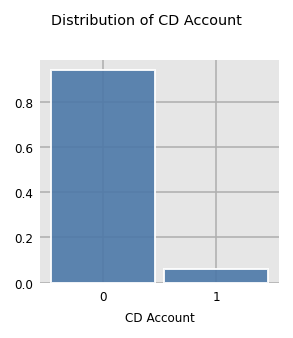

In [14]:
print("Distribution of Customer's CD Account")
print(data_1['CD Account'].value_counts(normalize=True))
dex.count('CD Account',data=data_1,title='Distribution of CD Account' , normalize=True)

Distribution of Online
1    0.5968
0    0.4032
Name: Online, dtype: float64


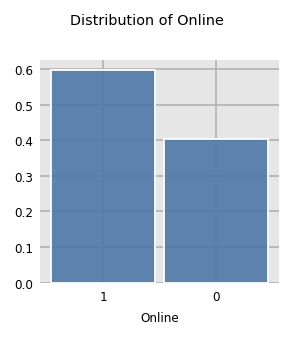

In [15]:
print("Distribution of Online")
print(data_1['Online'].value_counts(normalize=True))
dex.count('Online',data=data_1,title='Distribution of Online' , normalize=True)

Distribution of CreditCard
0    0.706
1    0.294
Name: CreditCard, dtype: float64


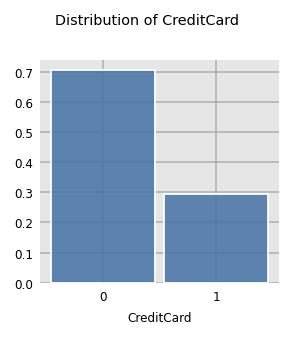

In [16]:
print("Distribution of CreditCard")
print(data_1['CreditCard'].value_counts(normalize=True))
dex.count('CreditCard',data=data_1,title='Distribution of CreditCard' , normalize=True)

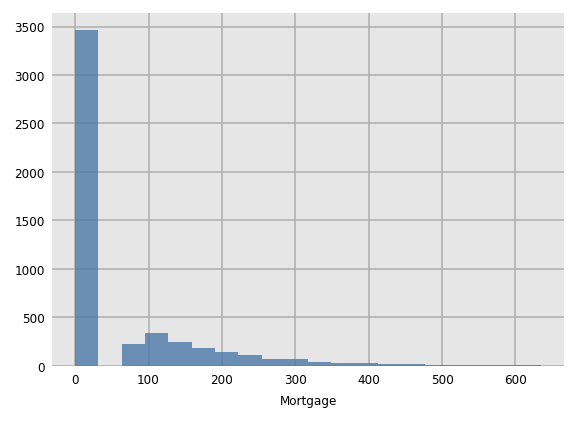

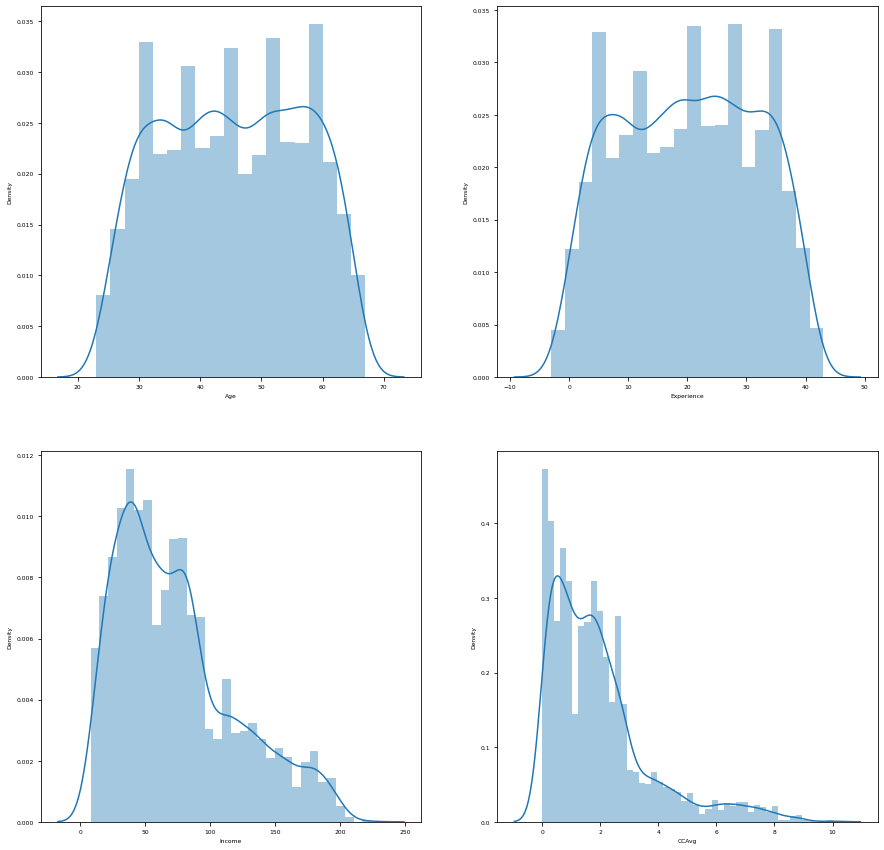

In [17]:
f,axes=plt.subplots(nrows=2,ncols=2,figsize=(15, 15))
sns.distplot(data_1['Age'],ax=axes[0,0])
sns.distplot(data_1['Experience'],ax=axes[0,1]);
sns.distplot(data_1['Income'],ax=axes[1,0]);
sns.distplot(data_1['CCAvg'],ax=axes[1,1]);
dex.hist('Mortgage', data=data_1)

### Summary

1. Personal Loan : data shows 90% of customers who has not accepted personal offer and close 9.6% accepted offer.This shows imbalanced behaviour within data. Accuracy wont be good measure of analisys.
2. Family : Most customer has single family memeber, 3 member family is least while approx. distribution of 2 and 4 family      member is same.
3. Education :Almost 41% of customers are undergraduates. respective 30% of custmers are professionals while 28% are graduate. There is no visible trend between Family and Education or age
4. Securities Account : almost 90% of the customers do not have security account with bank
5. CD Account: almost 90% of the customers do not have CD account with bank. only 4% have.
6. Online: almost 60% of the customers uses online banking
7. Credit Card : 30% of the customers have credit card
8. Mortgage : most of the customers do not have Mortgage, but rest shows right skewed distribution with very few with high mortgage values
9. Age and Experience : distribution of Age and Experience is fairly symmetric.
10. Income and CCAvg : shows right skewed disctirbution                

## Step 2.2 Bivariate data analysis

In [18]:
#sns.boxplot(data['Personal Loan'], data['Age']);

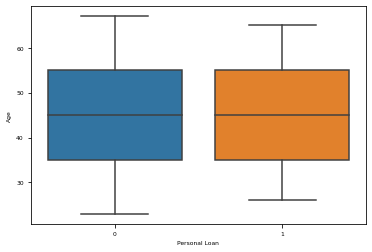

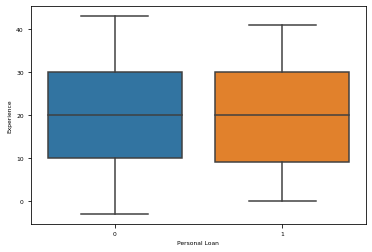

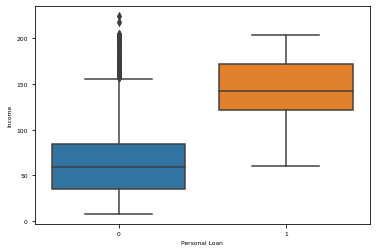

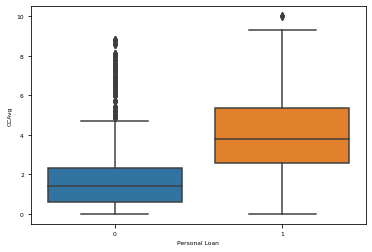

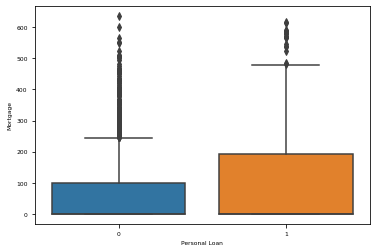

In [19]:
# Compairing target with continuous varibles
data_1.drop(['ID','ZIP Code'], axis=1,inplace=True)
num_list=[]
for i in data_1.columns:
    if (data_1[i].dtypes == 'int64') or (data_1[i].dtypes == 'float64'):
        sns.boxplot(data_1['Personal Loan'], data_1[i])
        plt.show()

# Understanding relation between Target with other continuous variables
1. Personal Loan acceptance does not show any visual trend with Age, Experience. 
2. Income shows trend with Personal loan, Higher income shows to have accepted personal loan offer earlier.
3. Customer, with higher credit card spend/utilization seemed to have accepted personal loan offer earlier.
4. Customers with higher mortgage amount seemed to have accepted personal loan offer earlier.
5. There are outliers, in Mortgage amount, CCAvg and Income. 

<AxesSubplot:xlabel='Personal Loan', ylabel='count'>

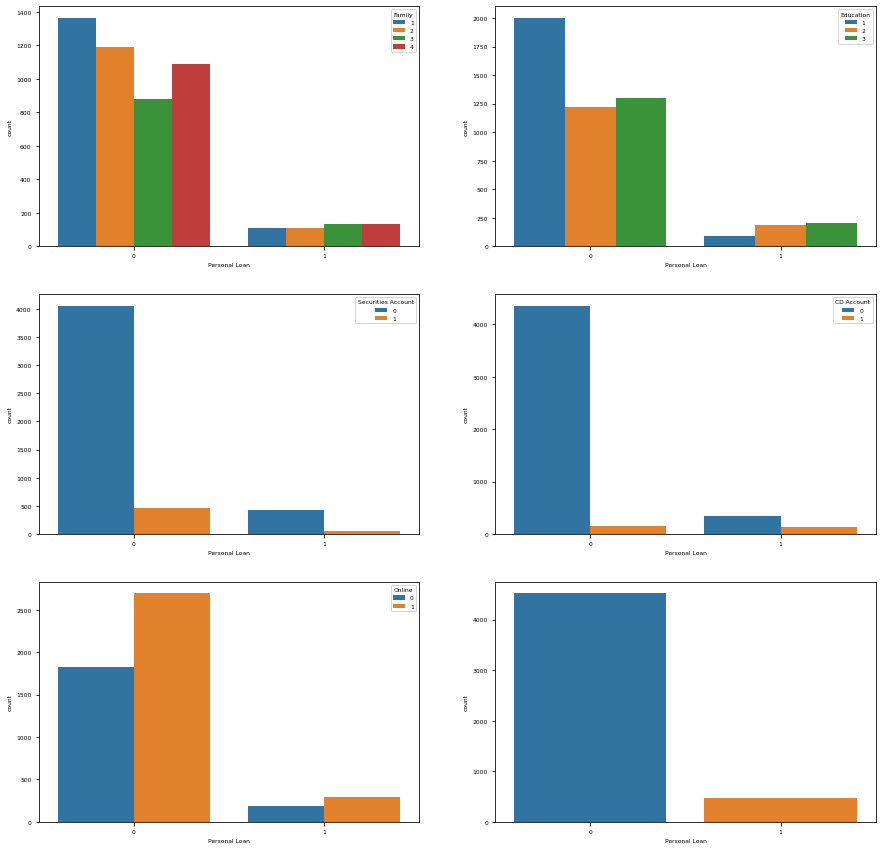

In [20]:
f,axes=plt.subplots(nrows=3,ncols=2,figsize=(15, 15))
sns.countplot(data_1['Personal Loan'],hue=data_1['Family'],ax=axes[0,0])
sns.countplot(data_1['Personal Loan'],hue=data_1['Education'],ax=axes[0,1]);
sns.countplot(data_1['Personal Loan'],hue=data_1['Securities Account'],ax=axes[1,0]);
sns.countplot(data_1['Personal Loan'],hue=data_1['CD Account'],ax=axes[1,1]);
sns.countplot(data_1['Personal Loan'],hue=data_1['Online'],ax=axes[2,0]);
sns.countplot(data_1['Personal Loan'],ax=axes[2,1])


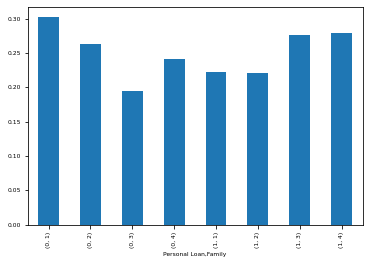

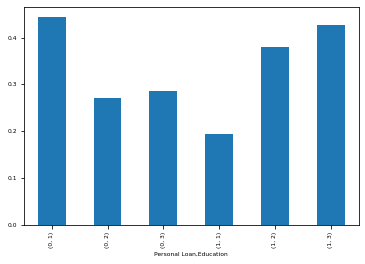

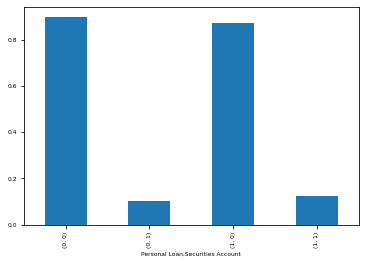

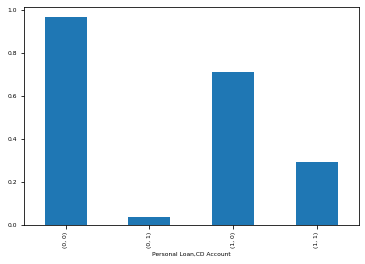

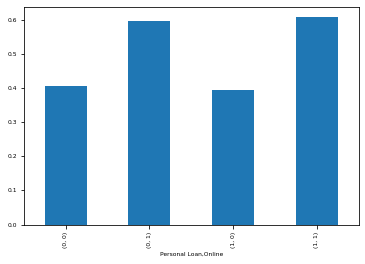

In [21]:
f,axes=plt.subplots(figsize=(6,4))
data_1.groupby(['Personal Loan'])['Family'].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.show()
f,axes=plt.subplots(figsize=(6,4))
data_1.groupby(['Personal Loan'])['Education'].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.show()
f,axes=plt.subplots(figsize=(6,4))
data_1.groupby(['Personal Loan'])['Securities Account'].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.show()
f,axes=plt.subplots(figsize=(6,4))
data_1.groupby(['Personal Loan'])['CD Account'].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.show()
f,axes=plt.subplots(figsize=(6,4))
data_1.groupby(['Personal Loan'])['Online'].value_counts(normalize=True).sort_index(ascending=True).plot(kind='bar')
plt.show()

Summary : 

1. Customers with more family members 3,4 seems to be accepted personal loan earlier
2. Graduate and Advance professional seemed to be accepted personal loan earlier
3. Customers who has CD account seems to be accepted personal offer
4. Distribution of customers using online banking looks same for both the type of customers

### Step 2.3: Multivariate data analysis

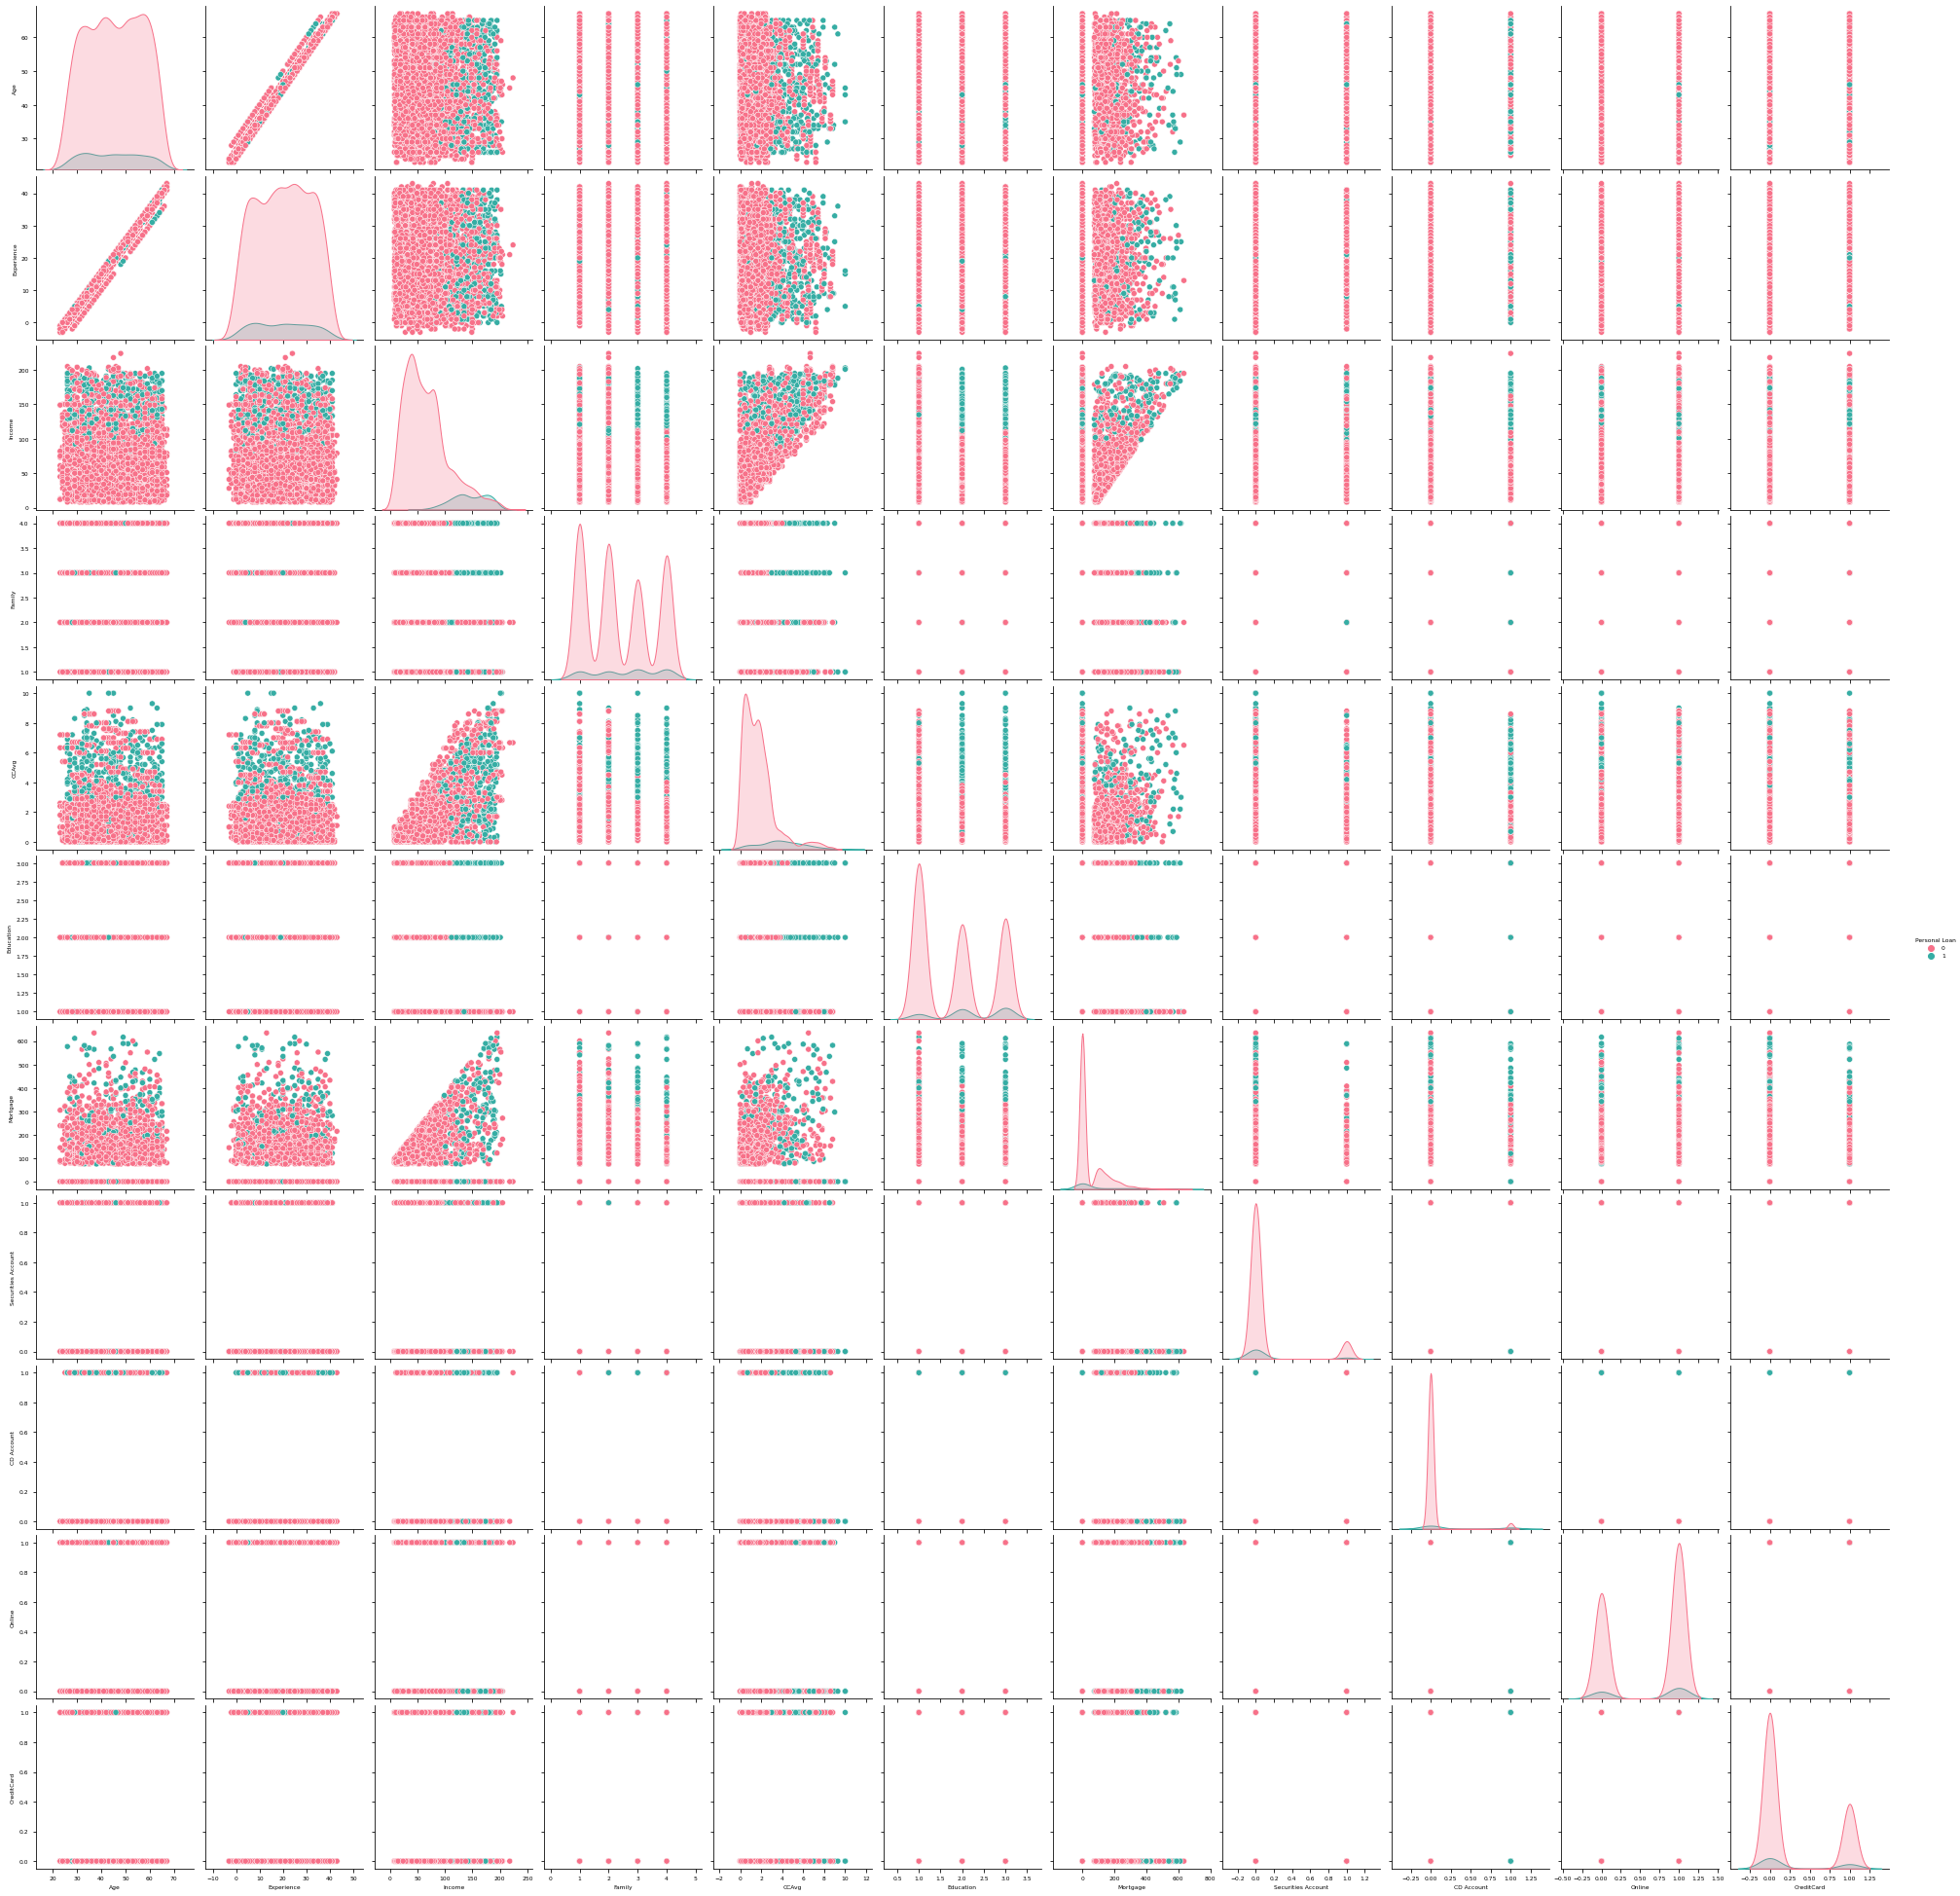

In [22]:
data.drop(['ID','ZIP Code'], axis=1,inplace=True)
sns.pairplot(data,hue='Personal Loan',palette='husl');

In [23]:
# import pandas_profiling
# pandas_profiling.ProfileReport(data)
#data_1

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


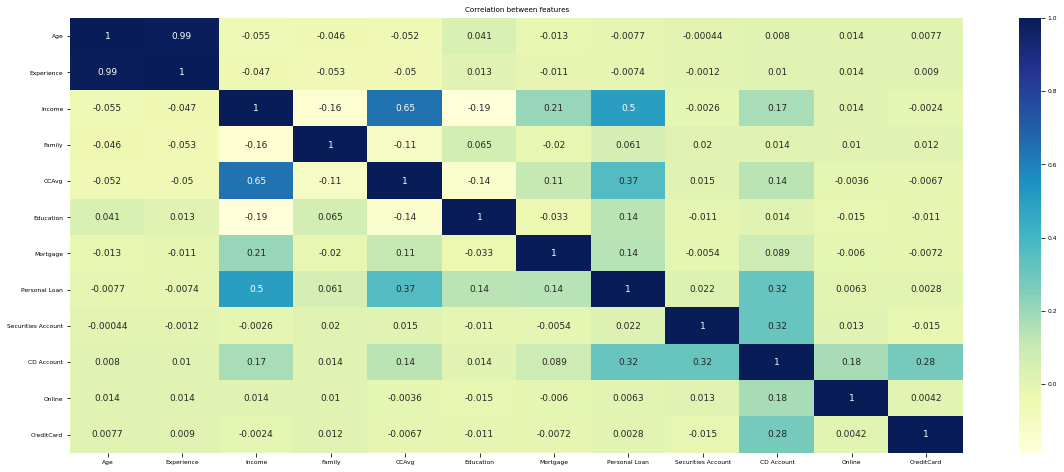

In [24]:
# To get a correlation matrix 
# Ploting correlation plot

plt.figure(figsize=(20, 8))
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, annot_kws={"fontsize":9}) 
  
# displaying heatmap 
# specify name of the plot
plt.title('Correlation between features')
plt.show() 

Summary

1. Age and Experience are highly corelated
2. Income and CCAvg ( average monthly spend ) are corelated
3. There is a directional relation can be seen between, Personal loan with Income, CCAvg, CD Account, Education and Mortagage.

In [25]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
#checking the association os Target with categorical variable
data_1.head()
cat_vars=['Family','Education','Securities Account','CD Account','Online','CreditCard']
# # train['Cabin']=labelencoder.fit_transform(train['Cabin'])
X=data[cat_vars]
y=data['Personal Loan']
chi_scores=chi2(X, y)

p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.round(5)

CreditCard            0.86780
Online                0.77804
Securities Account    0.14180
Family                0.00130
Education             0.00000
CD Account            0.00000
dtype: float64

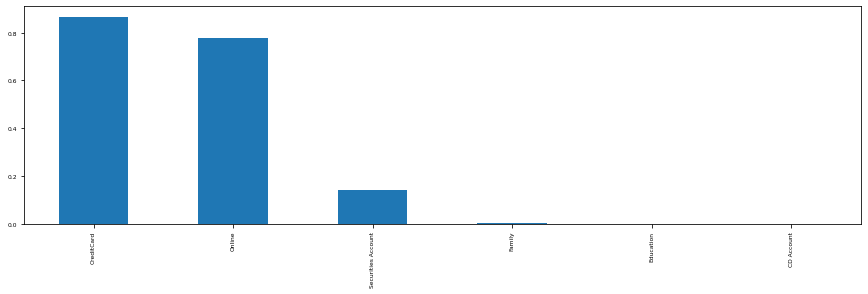

In [27]:
plt.figure(figsize=(15,4))
p_values.plot.bar();

Summary :
As per chi-square test Personal loan seems to have an association with CD Account, Family and Education

### Step3: Data Preprocessing

In [28]:
#replacing anamolies in data.
data.loc[data.Experience < 0, 'Experience'] = data.Experience.median()
#Normalize data
cols_for_nomalization=['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
sca=preprocessing.StandardScaler()
data_2=data[['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']]
data_2=sca.fit_transform(data_2)
data_2=pd.DataFrame(data_2, columns=cols_for_nomalization)

In [29]:
#dummy variables, dropping first category of dummy variables
dummy_column_list=['Family','Education','Securities Account','CD Account','Online','CreditCard']
data_3=data[dummy_column_list]
data_3=pd.get_dummies(data_3, columns=dummy_column_list,drop_first=True)
data_3.columns

data_final=pd.concat([data_2,data_3,data['Personal Loan']],axis=1)

In [30]:
data_final.head()

,Age,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,Securities Account_1,CD Account_1,Online_1,CreditCard_1,Personal Loan
0,-1.774417,-1.717717,-0.538229,-0.193385,-0.555524,0,0,1,0,0,1,0,0,0,0
1,-0.029524,-0.117989,-0.864109,-0.250611,-0.555524,0,1,0,0,0,1,0,0,0,0
2,-0.552992,-0.473484,-1.363793,-0.536736,-0.555524,0,0,0,0,0,0,0,0,0,0
3,-0.901970,-1.006727,0.569765,0.436091,-0.555524,0,0,0,1,0,0,0,0,0,0
4,-0.901970,-1.095601,-0.625130,-0.536736,-0.555524,0,0,1,1,0,0,0,0,1,0


In [31]:
## chosing variables came important
var_imp=['Personal Loan','Experience', 'Income', 'CCAvg', 'Mortgage','Family_2','Family_3','Family_4','Education_2','Education_3','CD Account_1']
data_final_1=data_final[var_imp]
data_final_1.head()

,Personal Loan,Experience,Income,CCAvg,Mortgage,Family_2,Family_3,Family_4,Education_2,Education_3,CD Account_1
0,0,-1.717717,-0.538229,-0.193385,-0.555524,0,0,1,0,0,0
1,0,-0.117989,-0.864109,-0.250611,-0.555524,0,1,0,0,0,0
2,0,-0.473484,-1.363793,-0.536736,-0.555524,0,0,0,0,0,0
3,0,-1.006727,0.569765,0.436091,-0.555524,0,0,0,1,0,0
4,0,-1.095601,-0.625130,-0.536736,-0.555524,0,0,1,1,0,0


### Step 4: Model Training on all variables except ID and zipcode

In [32]:
X=data_final.drop(['Personal Loan'], axis=1)
y=data_final['Personal Loan']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [34]:
print("Target data distribution in Train")
print(y_train.value_counts(normalize=True))
print("Target data distribution in Test")
print(y_test.value_counts(normalize=True))

Target data distribution in Train
0    0.905429
1    0.094571
Name: Personal Loan, dtype: float64
Target data distribution in Test
0    0.900667
1    0.099333
Name: Personal Loan, dtype: float64


Summary:
Distribution of Target class looks good both in Train and Test

In [35]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# Fit the model on train
lr_model = LogisticRegression(solver="liblinear")
lr_model.fit(x_train, y_train)
lr_model.score(x_train, y_train)
lr_model.score(x_test, y_test)

# #predict on test
y_predict_lr = lr_model.predict(x_test)
y_predict_lr_tr= lr_model.predict(x_train)

print("Logistic Regression Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict_lr_tr)))
print("Logistic Regression Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_lr)))
print()

print("Logistic Regression Train data Recall: {0:.4f}".format(metrics.recall_score(y_train, y_predict_lr_tr)))
print("Logistic Regression Test data Recall: {0:.4f}".format(metrics.recall_score(y_test, y_predict_lr)))
print()

print("Logistic Regression Train data Precision: {0:.4f}".format(metrics.precision_score(y_train, y_predict_lr_tr)))
print("Logistic Regression Test data Precision: {0:.4f}".format(metrics.precision_score(y_test, y_predict_lr)))
print()

print("Logistic Regression Train data F-1score: {0:.4f}".format(metrics.f1_score(y_train, y_predict_lr_tr)))
print("Logistic Regression Test data F-1score: {0:.4f}".format(metrics.f1_score(y_test, y_predict_lr)))
print()

Logistic Regression Train data Accuracy: 0.9609
Logistic Regression Test data Accuracy: 0.9520

Logistic Regression Train data Recall: 0.6677
Logistic Regression Test data Recall: 0.5839

Logistic Regression Train data Precision: 0.8911
Logistic Regression Test data Precision: 0.8969

Logistic Regression Train data F-1score: 0.7634
Logistic Regression Test data F-1score: 0.7073



Confusion Matrix for Logistic Regression


<AxesSubplot:>

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


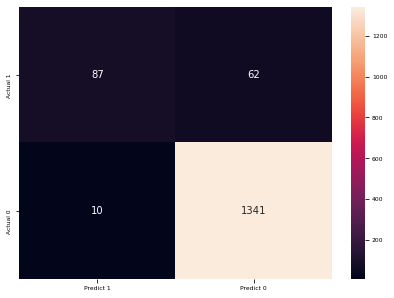

In [36]:
print("Confusion Matrix for Logistic Regression")
cm=metrics.confusion_matrix(y_test, y_predict_lr, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

Summary:
1. For logistic Regression model accuracy is 96% vs 95 % respectively from train and test data
2. With 0.5 as default threshold, Recall and Precision of test data is low. with F1-score 0.71 for test data

In [37]:
from sklearn.neighbors import KNeighborsClassifier

In [38]:
scores =[]
for k in range(1,90):
    NNH = KNeighborsClassifier(n_neighbors = k, weights = 'distance' )
    NNH.fit(x_train, y_train)
    scores.append(NNH.score(x_test, y_test))

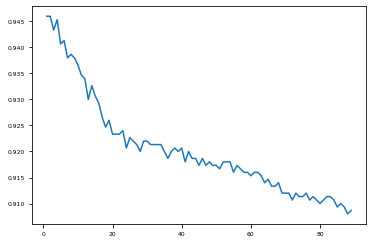

In [39]:
plt.plot(range(1,90),scores)

In [40]:
KNN= KNeighborsClassifier(n_neighbors= 5, weights = 'distance' )
# Call Nearest Neighbour algorithm

KNN.fit(x_train, y_train)
y_predict_knn = KNN.predict(x_test)
y_predict_knn_tr = KNN.predict(x_train)
# KNN.score(x_test, y_test)

print("KNN Train data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict_knn_tr)))
print("KNN Test data Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_predict_knn)))
print()
print("KNN Train data Recall: {0:.4f}".format(metrics.recall_score(y_train, y_predict_knn_tr)))
print("KNN Test data Recall: {0:.4f}".format(metrics.recall_score(y_test, y_predict_knn)))
print()
print("KNN Train data Precision: {0:.4f}".format(metrics.precision_score(y_train, y_predict_knn_tr)))
print("KNN Test data Precision: {0:.4f}".format(metrics.precision_score(y_test, y_predict_knn)))
print()
print("KNN Train data F-1score: {0:.4f}".format(metrics.f1_score(y_train, y_predict_knn_tr)))
print("KNN Test data F-1score: {0:.4f}".format(metrics.f1_score(y_test, y_predict_knn)))
print()

KNN Train data Accuracy: 1.0000
KNN Test data Accuracy: 0.9407

KNN Train data Recall: 1.0000
KNN Test data Recall: 0.4161

KNN Train data Precision: 1.0000
KNN Test data Precision: 0.9688

KNN Train data F-1score: 1.0000
KNN Test data F-1score: 0.5822



Confusion Matrix for K-Nearest Neighbour


<AxesSubplot:>

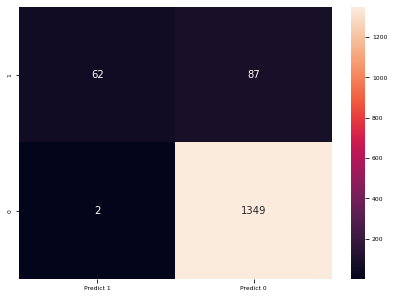

In [41]:
print("Confusion Matrix for K-Nearest Neighbour")
cm=metrics.confusion_matrix(y_test, y_predict_knn, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

Summary:
1. KNN shows overfitting, with high accuracy on Train data and comparatively low on test data
2. KNN shows low f1-Score. Model may not be working well with imbalance data.

In [42]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

# creatw the model
NB_model = GaussianNB()

NB_model.fit(x_train, y_train)
y_predict_NB_tr = NB_model.predict(x_train)
y_predict_NB = NB_model.predict(x_test)
from sklearn import metrics

print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, y_predict_NB_tr)))
print("Model Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test,y_predict_NB)))
print()
print("KNN Train data Recall: {0:.4f}".format(metrics.recall_score(y_train, y_predict_NB_tr)))
print("KNN Test data Recall: {0:.4f}".format(metrics.recall_score(y_test, y_predict_NB)))
print()
print("NB Train data Precision: {0:.4f}".format(metrics.precision_score(y_train, y_predict_NB_tr)))
print("NB Test data Precision: {0:.4f}".format(metrics.precision_score(y_test, y_predict_NB)))
print()
print("NB Train data F-1score: {0:.4f}".format(metrics.f1_score(y_train, y_predict_NB_tr)))
print("NB Test data F-1score: {0:.4f}".format(metrics.f1_score(y_test,  y_predict_NB)))
print()

Model Accuracy: 0.8911
Model Accuracy: 0.8753

KNN Train data Recall: 0.6103
KNN Test data Recall: 0.5705

NB Train data Precision: 0.4449
NB Test data Precision: 0.4087

NB Train data F-1score: 0.5146
NB Test data F-1score: 0.4762



Summary:
1. NaiveBayes shows comparatively less acurracy compared to KNN and logistic Regression.
2. NB shows low f1-Score. Model may not be working well with imbalance data.

<AxesSubplot:>

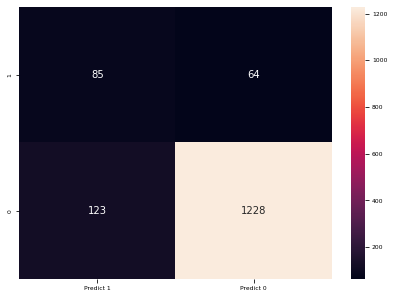

In [43]:
cm=metrics.confusion_matrix(y_test, y_predict_NB, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

### Step 4: model comparision

In [44]:
from sklearn.metrics import roc_curve, auc

In [45]:
classifier1 = LogisticRegression()
classifier2 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance', )
classifier3 = GaussianNB()
probas1_ = classifier1.fit(x_train, y_train).predict_proba(x_test)
probas2_ = classifier2.fit(x_train, y_train).predict_proba(x_test)
probas3_ = classifier3.fit(x_train, y_train).predict_proba(x_test)

In [46]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve for Logistic Regression : %f" % roc_auc1)

Area under the ROC curve for Logistic Regression : 0.955370


In [47]:
# Compute ROC curve and area the curve for KNN
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve  for KNN: %f" % roc_auc2)

Area under the ROC curve  for KNN: 0.912178


In [48]:
# Compute ROC curve and area the curve for NB
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve  for NB: %f" % roc_auc3)

Area under the ROC curve  for NB: 0.912772


Summary
1. Area under the ROC curve for Logistic Regression : 0.955370
2. Area under the ROC curve  for KNN: 0.912178
3. Area under the ROC curve  for NB: 0.912772


In [49]:
# Plot the ROC
# Plot ROC curve
import pylab as pl

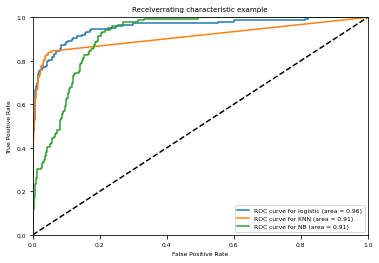

In [50]:
#Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for KNN (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for NB (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

### Summary :
1. Based on the AUC it can be concluded that Logistic Regression is working better than other models for this data.
2. Logistic Regression, has shown better perfomance on classification of both the classes, compared to other models.Logistic model has least incorrect labels. This can be further imporved by adjusting Threshold
3. KNN overfits the data. KNN has maximum False Negative. KNN has high Precision than recall, so shows better performance for Personal Loan as 0 means majority class. This shows,model is working fine for majority class vs minority( Personal Loan being zero). Model is to perform properly for Personal Loan =1
4. Naive Bayes model, has shown good results to classify Personal Loan =1. Showing high Recall value compared to Precision. Naive Bayes model has more False Positive than any other model. So not able to perform properly for Personal Loan =0

## Adjusting the classification threshold

In [51]:
import pandas as pd
import numpy as np
import math
from numpy import argmax

i = np.arange(len(tpr1)) # index for df
roc1 = pd.DataFrame({'fpr1' : pd.Series(fpr1, index=i),
                     'tpr1' : pd.Series(tpr1, index = i), 
                     '1-fpr1' : pd.Series(1-fpr1, index = i), 
                     'tf1' : pd.Series(tpr1 - (1-fpr1), index = i), 
                     'thresholds1' : pd.Series(thresholds1, index = i)
                                         })

In [52]:
roc1['gmeans'] = np.sqrt(roc1['tf1'])
roc1[roc1['gmeans']>=0.4]
# print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[109], gmeans[109]))
roc1_sort=roc1.sort_values(by='tpr1',ascending=False )
roc1_sort[0:50]

,fpr1,tpr1,1-fpr1,tf1,thresholds1,gmeans
109,1.000000,1.000000,0.000000,1.000000,0.000007,1.000000
108,0.823094,1.000000,0.176906,0.823094,0.000396,0.907245
107,0.823094,0.993289,0.176906,0.816383,0.000400,0.903539
106,0.813472,0.993289,0.186528,0.806760,0.000444,0.898198
105,0.813472,0.986577,0.186528,0.800049,0.000449,0.894454
104,0.812731,0.986577,0.187269,0.799308,0.000451,0.894041
103,0.811251,0.986577,0.188749,0.797828,0.000455,0.893212
102,0.600296,0.986577,0.399704,0.586873,0.002285,0.766077
101,0.600296,0.979866,0.399704,0.580162,0.002305,0.761684
100,0.553664,0.979866,0.446336,0.533530,0.003091,0.730431


In [53]:
# print the first 10 predicted class with default threshold of .5
y_predict_lr = lr_model.predict(x_test)
print(y_predict_lr[0:10])
y_predict_lr_prob=lr_model.predict_proba(x_test)[:, 1]
y_predict_lr_prob

[0 0 0 0 0 0 0 0 1 0]


array([0.034669  , 0.00091364, 0.00115963, ..., 0.00164028, 0.00676294,
       0.00105314])

In [54]:
y_predict_lr_prob[0:10] 

array([0.034669  , 0.00091364, 0.00115963, 0.00695374, 0.09392305,
       0.00327297, 0.00590082, 0.11126939, 0.71794434, 0.07702506])

In [55]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_predict_lr_prob], 0.4)[0] 
y_pred_class[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

<AxesSubplot:>

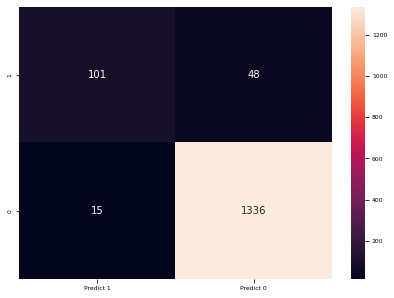

In [56]:
cm=metrics.confusion_matrix(y_test, y_pred_class, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

In [57]:
print("Logistic Regression Test data Recall: {0:.4f}".format(metrics.recall_score(y_test, y_pred_class)))
print()

print("Logistic Regression Test data Precision: {0:.4f}".format(metrics.precision_score(y_test, y_pred_class)))
print()
print("Logistic Regression Test data F-1score: {0:.4f}".format(metrics.f1_score(y_test, y_pred_class)))


Logistic Regression Test data Recall: 0.6779

Logistic Regression Test data Precision: 0.8707

Logistic Regression Test data F-1score: 0.7623


Summary: 
1. By Adjusting threshold to 0.4 we can see an improvement in model performance. There is an increase of approx 9% in Recall with only drop of 2% in Precision with approx. 6% increse in F1 score. As a result, Confusion matix can show, increase in True positive. 

## Iteration 2 - with Variable importance

In [58]:
X1=data_final_1.drop(['Personal Loan'], axis=1)
y1=data_final_1['Personal Loan']

In [59]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=1)

Confusion Matrix for Logistic Regression


<AxesSubplot:>

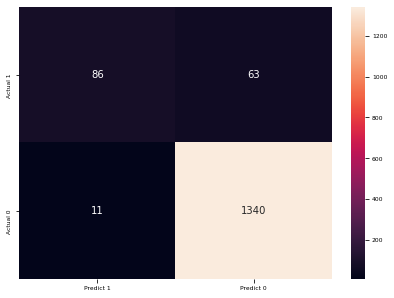

In [60]:
lr_model.fit(x1_train, y1_train)
y_predict_lr1 = lr_model.predict(x1_test)
print("Confusion Matrix for Logistic Regression")
cm=metrics.confusion_matrix(y1_test, y_predict_lr1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

Confusion Matrix for K-Nearest Neighbour


<AxesSubplot:>

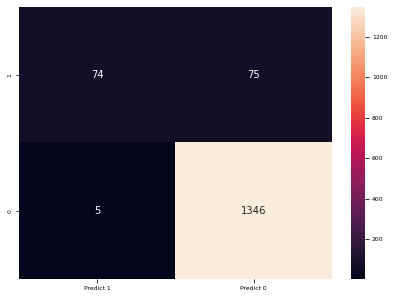

In [61]:
KNN.fit(x1_train, y1_train)
y_predict_knn1 = KNN.predict(x1_test)
print("Confusion Matrix for K-Nearest Neighbour")
cm=metrics.confusion_matrix(y1_test, y_predict_knn1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

In [62]:
NB_model.fit(x1_train, y1_train)
y_predict_NB1 = NB_model.predict(x1_test)

<AxesSubplot:>

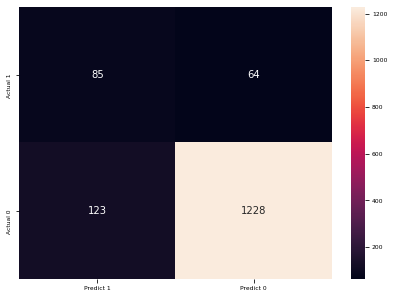

In [63]:
cm=metrics.confusion_matrix(y1_test, y_predict_NB1, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["Actual 1","Actual 0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g',annot_kws={"fontsize":10})

In [64]:
classifier1 = LogisticRegression()
classifier2 = KNeighborsClassifier(n_neighbors= 5, weights = 'distance', )
classifier3 = GaussianNB()
probas1_ = classifier1.fit(x1_train, y1_train).predict_proba(x1_test)
probas2_ = classifier2.fit(x1_train, y1_train).predict_proba(x1_test)
probas3_ = classifier3.fit(x1_train, y1_train).predict_proba(x1_test)

In [65]:
# Compute ROC curve and area the curve for logistic
fpr11, tpr11, thresholds11 = roc_curve(y1_test, probas1_[:, 1])
roc_auc11 = auc(fpr11, tpr11)
print("Area under the ROC curve for Logistic Regression : %f" % roc_auc11)

Area under the ROC curve for Logistic Regression : 0.952101


In [66]:
# Compute ROC curve and area the curve for KNN
fpr21, tpr21, thresholds21 = roc_curve(y1_test, probas2_[:, 1])
roc_auc21 = auc(fpr21, tpr21)
print("Area under the ROC curve  for KNN: %f" % roc_auc21)

Area under the ROC curve  for KNN: 0.946170


In [67]:
# Compute ROC curve and area the curve for NB
fpr31, tpr31, thresholds31 = roc_curve(y1_test, probas3_[:, 1])
roc_auc31 = auc(fpr31, tpr31)
print("Area under the ROC curve  for NB: %f" % roc_auc31)

Area under the ROC curve  for NB: 0.914292


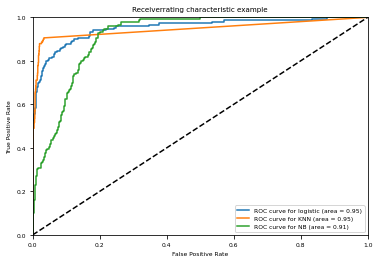

In [68]:
#Plot ROC curve
pl.clf()
pl.plot(fpr11, tpr11, label='ROC curve for logistic (area = %0.2f)' % roc_auc11)
pl.plot(fpr21, tpr21, label='ROC curve for KNN (area = %0.2f)' % roc_auc21)
pl.plot(fpr31, tpr31, label='ROC curve for NB (area = %0.2f)' % roc_auc31)
pl.plot([0, 1], [0, 1], 'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()

Summary :
In 2nd iteration,after considering only important variables as per prelimanry test, we can see overal improvement in KNN model
Though Logistic regression seems to be working well